In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , f1_score, confusion_matrix, precision_score , recall_score , classification_report
from imblearn.over_sampling import RandomOverSampler , SMOTE
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
data = df
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data= data.drop(columns = ["id","Unnamed: 32"], inplace = True)


In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

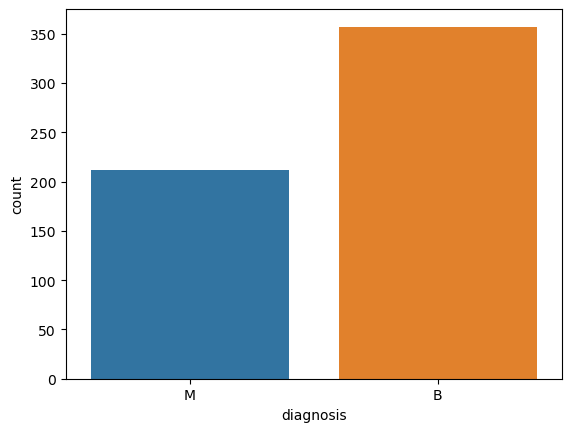

In [8]:
sns.countplot(x= "diagnosis" , data=df)

<Axes: >

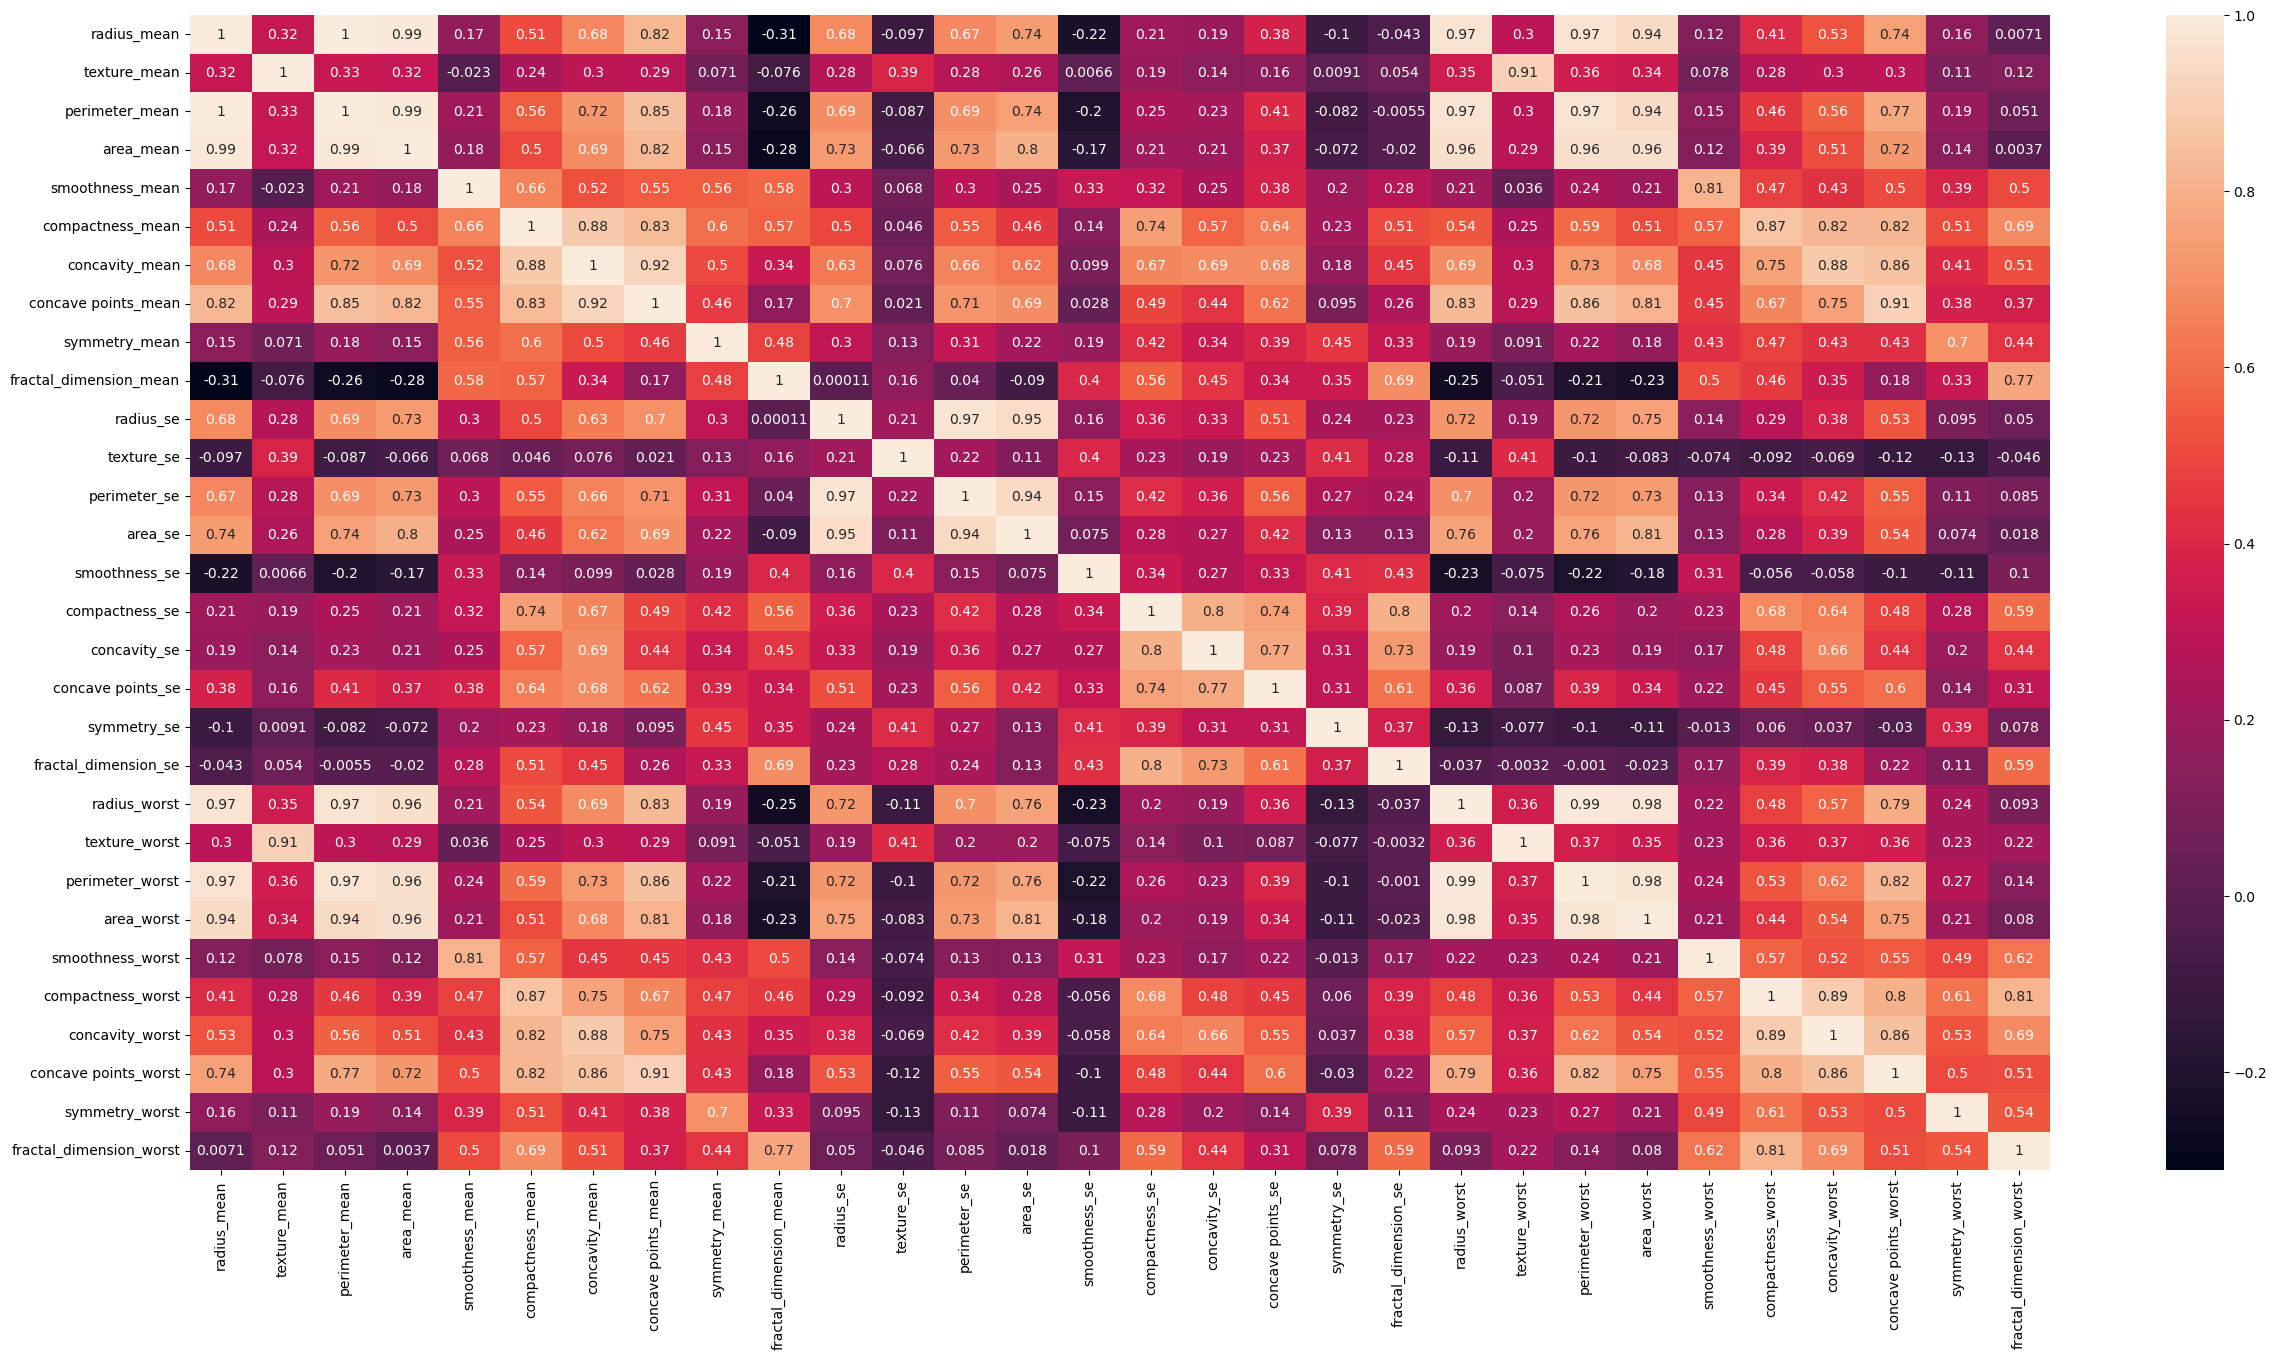

In [9]:
df.corr()
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot = True)

In [10]:
x= df.drop(["diagnosis"],axis = 1)
y = df["diagnosis"]
print(x.shape)
x.head(10)

(569, 30)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [11]:
y.head(10)

0    M
1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: diagnosis, dtype: object

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 24,stratify=y )
print("x_train shape :- ",x_train.shape)
print("x_text shape :-", x_test.shape)

x_train shape :-  (455, 30)
x_text shape :- (114, 30)


In [13]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = log_reg.predict(x_test)

cnf = confusion_matrix(y_test,y_pred)
print("confusion matrix :- \n", cnf)
print("=="*60)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy :-\n", accuracy)
print("=="*60)

clf_report = classification_report(y_test,y_pred)
print("classification_report\n",clf_report)


confusion matrix :- 
 [[70  2]
 [ 3 39]]
accuracy :-
 0.956140350877193
classification_report
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
y_train_pred = log_reg.predict(x_train)

cnf = confusion_matrix(y_train,y_train_pred)
print("confusion matrix :- \n", cnf)
print("=="*60)

accuracy = accuracy_score(y_train,y_train_pred)
print("accuracy :-\n", accuracy)
print("=="*60)

clf_report = classification_report(y_train,y_train_pred)
print("classification_report\n",clf_report)


confusion matrix :- 
 [[274  11]
 [ 14 156]]
accuracy :-
 0.945054945054945
classification_report
               precision    recall  f1-score   support

           B       0.95      0.96      0.96       285
           M       0.93      0.92      0.93       170

    accuracy                           0.95       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.95      0.94       455



In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [17]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_pred = log_reg.predict(x_test)

cnf = confusion_matrix(y_test,y_pred)
print("confusion matrix :- \n", cnf)
print("=="*60)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy :-\n", accuracy)
print("=="*60)

clf_report = classification_report(y_test,y_pred)
print("classification_report\n",clf_report)

confusion matrix :- 
 [[70  1]
 [ 4 39]]
accuracy :-
 0.956140350877193
classification_report
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
y_train_pred = log_reg.predict(x_train)

cnf = confusion_matrix(y_train,y_train_pred)
print("confusion matrix :- \n", cnf)
print("=="*60)

accuracy = accuracy_score(y_train,y_train_pred)
print("accuracy :-\n", accuracy)
print("=="*60)

clf_report = classification_report(y_train,y_train_pred)
print("classification_report\n",clf_report)


confusion matrix :- 
 [[278   8]
 [ 12 157]]
accuracy :-
 0.9560439560439561
classification_report
               precision    recall  f1-score   support

           B       0.96      0.97      0.97       286
           M       0.95      0.93      0.94       169

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455



### KNN Classifier 

In [20]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(x_test)
y_pred[:5]

array(['B', 'M', 'M', 'B', 'B'], dtype=object)

In [22]:
y_train_pred = knn.predict(x_train)
y_train_pred[:5]

array(['B', 'M', 'B', 'B', 'B'], dtype=object)

In [23]:
cnf = confusion_matrix(y_test, y_pred)
print("confusion matrix :-\n", cnf)
print("=="*60)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy :- \n",accuracy)
print("=="*60)

clf = classification_report(y_test,y_pred)
print("classification report :- \n", clf)

confusion matrix :-
 [[71  0]
 [ 5 38]]
Accuracy :- 
 0.956140350877193
classification report :- 
               precision    recall  f1-score   support

           B       0.93      1.00      0.97        71
           M       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [24]:
cnf = confusion_matrix(y_train, y_train_pred)
print("confusion matrix :-\n", cnf)
print("=="*60)

accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy :- \n",accuracy)
print("=="*60)

clf = classification_report(y_train, y_train_pred)
print("classification report :- \n", clf)

confusion matrix :-
 [[281   5]
 [ 22 147]]
Accuracy :- 
 0.9406593406593406
classification report :- 
               precision    recall  f1-score   support

           B       0.93      0.98      0.95       286
           M       0.97      0.87      0.92       169

    accuracy                           0.94       455
   macro avg       0.95      0.93      0.94       455
weighted avg       0.94      0.94      0.94       455



### Decision tree classifier

In [25]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt_cls.predict(x_test)

cnf = confusion_matrix(y_test,y_pred)
print("Confusion matrix : \n", cnf)
print(".."*60)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :" ,accuracy)
print(".."*60)
cls_rpt = classification_report(y_test,y_pred)
print("Classification report: \n" , cls_rpt)


Confusion matrix : 
 [[68  3]
 [ 4 39]]
........................................................................................................................
Accuracy : 0.9385964912280702
........................................................................................................................
Classification report: 
               precision    recall  f1-score   support

           B       0.94      0.96      0.95        71
           M       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [27]:
y_train_pred = dt_cls.predict(x_train)

cnf = confusion_matrix(y_train, y_train_pred)
print("confusion matrix : \n" , cnf)
print(".."*60)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy :\n" , accuracy)
print(".."*60)
clf_rpt= classification_report(y_train, y_train_pred)
print("Classification report :\n" ,clf_rpt)


confusion matrix : 
 [[286   0]
 [  0 169]]
........................................................................................................................
Accuracy :
 1.0
........................................................................................................................
Classification report :
               precision    recall  f1-score   support

           B       1.00      1.00      1.00       286
           M       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



### hyperparameter tuning 

In [28]:
dt_cls = DecisionTreeClassifier()

hyperparameter ={"criterion" :['gini','entropy'],
                "max_depth" :np.arange(3,8),
                "min_samples_split":np.arange(2,20),
                "min_samples_leaf":np.arange(2,15)}

In [29]:
gscv_dt_cls = GridSearchCV(dt_cls , hyperparameter, cv=5)
gscv_dt_cls.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [30]:
gscv_dt_cls.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=12)

In [31]:
dt_clf = gscv_dt_cls.best_estimator_
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=12)

In [32]:
y_pred = dt_clf.predict(x_test)

cnf = confusion_matrix(y_test,y_pred)
print("confusion matrix : \n" , cnf)
print(".."*60)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :\n" , accuracy)
print(".."*60)
clf_rpt = classification_report(y_test, y_pred)
print("Classification report :\n" ,clf_rpt)


confusion matrix : 
 [[70  1]
 [ 5 38]]
........................................................................................................................
Accuracy :
 0.9473684210526315
........................................................................................................................
Classification report :
               precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [33]:
y_pred_train = dt_clf.predict(x_train)

cnf = confusion_matrix(y_train,y_pred_train)
print("confusion matrix : \n" , cnf)
print(".."*60)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :\n" , accuracy)
print(".."*60)
clf_rpt = classification_report(y_train,y_pred_train)
print("Classification report :\n" ,clf_rpt)


confusion matrix : 
 [[285   1]
 [  4 165]]
........................................................................................................................
Accuracy :
 0.989010989010989
........................................................................................................................
Classification report :
               precision    recall  f1-score   support

           B       0.99      1.00      0.99       286
           M       0.99      0.98      0.99       169

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



## Punining 

In [47]:
dt_model = DecisionTreeClassifier(random_state = 5)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [48]:
y_pred = dt_model.predict(x_test)
print("tesing prediction ",y_pred[:5])
print(".."*60)

cnf = confusion_matrix(y_test , y_pred)
print("Confusion matrix : \n", cnf)

accuracy = accuracy_score(y_test , y_pred)
print("Accuracy : \n", accuracy)
print(".."*60)

cls_rpt = classification_report(y_test , y_pred)
print("Classification Report : \n", cls_rpt)
print(".."*60)

tesing prediction  ['B' 'M' 'M' 'B' 'B']
........................................................................................................................
Confusion matrix : 
 [[68  3]
 [ 3 40]]
Accuracy : 
 0.9473684210526315
........................................................................................................................
Classification Report : 
               precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

........................................................................................................................


In [49]:
y_pred_train = dt_model.predict(x_train)
print("traing prediction ",y_pred_train[:5])
print(".."*60)

cnf = confusion_matrix(y_train , y_pred_train)
print("Confusion matrix : \n", cnf)

accuracy = accuracy_score(y_train , y_pred_train)
print("Accuracy : \n", accuracy)
print(".."*60)

cls_rpt = classification_report(y_train , y_pred_train)
print("Classification Report : \n", cls_rpt)
print(".."*60)

traing prediction  ['B' 'M' 'B' 'B' 'B']
........................................................................................................................
Confusion matrix : 
 [[286   0]
 [  0 169]]
Accuracy : 
 1.0
........................................................................................................................
Classification Report : 
               precision    recall  f1-score   support

           B       1.00      1.00      1.00       286
           M       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

........................................................................................................................


In [52]:
result = dt_model.cost_complexity_pruning_path(x_train,y_train)
result["ccp_alphas"]

array([0.        , 0.00218083, 0.0029304 , 0.00431133, 0.00559513,
       0.00743872, 0.0086638 , 0.01291987, 0.01438561, 0.02404453,
       0.02442056, 0.0306549 , 0.3228506 ])

In [53]:
ccp_alpha_list = result["ccp_alphas"]
ccp_alpha_list

array([0.        , 0.00218083, 0.0029304 , 0.00431133, 0.00559513,
       0.00743872, 0.0086638 , 0.01291987, 0.01438561, 0.02404453,
       0.02442056, 0.0306549 , 0.3228506 ])

In [54]:
for ccp_alpha in ccp_alpha_list:
    print(ccp_alpha)

0.0
0.00218083075225933
0.0029304029304029304
0.004311334641004935
0.005595128280123898
0.007438715131022823
0.008663799968147794
0.012919873648618588
0.014385614385614387
0.024044526901669756
0.02442055678423035
0.030654899499189175
0.32285060033114216


## Random Forest

In [57]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
y_pred = random_forest.predict(x_test)
print("tesing prediction ",y_pred[:5])
print(".."*60)

cnf = confusion_matrix(y_test , y_pred)
print("Confusion matrix : \n", cnf)

accuracy = accuracy_score(y_test , y_pred)
print("Accuracy : \n", accuracy)
print(".."*60)

cls_rpt = classification_report(y_test , y_pred)
print("Classification Report : \n", cls_rpt)
print(".."*60)

tesing prediction  ['B' 'M' 'M' 'B' 'B']
........................................................................................................................
Confusion matrix : 
 [[70  1]
 [ 3 40]]
Accuracy : 
 0.9649122807017544
........................................................................................................................
Classification Report : 
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

........................................................................................................................


In [60]:
y_train_pred = random_forest.predict(x_train)
print("traing prediction ",y_pred_train[:5])
print(".."*60)

cnf = confusion_matrix(y_train , y_pred_train)
print("Confusion matrix : \n", cnf)

accuracy = accuracy_score(y_train , y_pred_train)
print("Accuracy : \n", accuracy)
print(".."*60)

cls_rpt = classification_report(y_train , y_pred_train)
print("Classification Report : \n", cls_rpt)
print(".."*60)

traing prediction  ['B' 'M' 'B' 'B' 'B']
........................................................................................................................
Confusion matrix : 
 [[286   0]
 [  0 169]]
Accuracy : 
 1.0
........................................................................................................................
Classification Report : 
               precision    recall  f1-score   support

           B       1.00      1.00      1.00       286
           M       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

........................................................................................................................


## Hyperparameter Tuning

In [61]:
hyperparameter = {"n_estimators" :np.arange(10,200),
                 "criterion":['gini','entropy'],
                    "max_depth" : np.arange(3,8),
                    "min_samples_split": np.arange(4,20),
                    "min_samples_leaf" : np.arange(3,10),
                    "max_features":[7]
                   }


In [63]:
rscv_rf_model = RandomizedSearchCV(random_forest,hyperparameter, cv=5)
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': [7],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [65]:
y_pred = rscv_rf_model.predict(x_test)
print("tesing prediction ",y_pred[:5])
print(".."*60)

cnf = confusion_matrix(y_test , y_pred)
print("Confusion matrix : \n", cnf)

accuracy = accuracy_score(y_test , y_pred)
print("Accuracy : \n", accuracy)
print(".."*60)

cls_rpt = classification_report(y_test , y_pred)
print("Classification Report : \n", cls_rpt)
print(".."*60)

tesing prediction  ['B' 'M' 'M' 'B' 'B']
........................................................................................................................
Confusion matrix : 
 [[69  2]
 [ 3 40]]
Accuracy : 
 0.956140350877193
........................................................................................................................
Classification Report : 
               precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

........................................................................................................................


In [67]:
y_train_pred = rscv_rf_model.predict(x_train)
print("traing prediction ",y_pred_train[:5])
print(".."*60)

cnf = confusion_matrix(y_train , y_pred_train)
print("Confusion matrix : \n", cnf)

accuracy = accuracy_score(y_train , y_pred_train)
print("Accuracy : \n", accuracy)
print(".."*60)

cls_rpt = classification_report(y_train , y_pred_train)
print("Classification Report : \n", cls_rpt)
print(".."*60)

traing prediction  ['B' 'M' 'B' 'B' 'B']
........................................................................................................................
Confusion matrix : 
 [[286   0]
 [  0 169]]
Accuracy : 
 1.0
........................................................................................................................
Classification Report : 
               precision    recall  f1-score   support

           B       1.00      1.00      1.00       286
           M       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

........................................................................................................................


In [71]:
result = pd.DataFrame({"Training":[ 0.94,0.95,1.0,0.98,1.0,1.0,1.0],
                         "Testing":[0.95,0.94,0.93,0.94,0.95, 0.94, 0.95]},
              index=["Logostic Regression","KNN","Decision_Tree","Decison_Tree(Hyper)","Decision_Tree(Prunin)","Randpm Forest","Randpm Forest(Hyper)"])
result

,Training,Testing
Logostic Regression,0.94,0.95
KNN,0.95,0.94
Decision_Tree,1.00,0.93
Decison_Tree(Hyper),0.98,0.94
Decision_Tree(Prunin),1.00,0.95
Randpm Forest,1.00,0.94
Randpm Forest(Hyper),1.00,0.95


In [72]:
import pickle

In [73]:
file_path = 'data.pickle'

In [74]:
with open(file_path, 'wb') as file:
    pickle.dump(data,file)

In [75]:
print(f'Data has been pickled and saved to {file_path}')


Data has been pickled and saved to data.pickle


In [76]:
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)

print('Loaded data:', loaded_data)

Loaded data: None
